In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns


In [2]:
site_groups = ['1000-sites','5000-sites','10000-sites','20000-sites','30000-sites','50000-sites']
metric = 'AUC'


In [3]:
ULP_boxplot_data = pd.DataFrame()
for site_group in site_groups:
    current = pd.read_csv('../../delfi_downsampled_cancer_detection/number_of_sites_analysis/logreg_PCA_results/'+site_group+'_logreg_results/'+site_group+'.'+metric+'.txt', sep='\t')
    current = current[['overall']]
    current['site_group'] = site_group
    current = current.set_index('site_group').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
    current['dataset'] = 'ULP'
    ULP_boxplot_data = ULP_boxplot_data.append(current)
    

In [4]:
ULP_boxplot_data

,site_group,group,AUC,dataset
0,1000-sites,overall,0.76704,ULP
1,1000-sites,overall,0.80868,ULP
2,1000-sites,overall,0.71185,ULP
3,1000-sites,overall,0.82982,ULP
4,1000-sites,overall,0.81521,ULP
...,...,...,...,...
995,50000-sites,overall,0.90088,ULP
996,50000-sites,overall,0.88148,ULP
997,50000-sites,overall,0.90377,ULP
998,50000-sites,overall,0.90432,ULP


In [5]:
low_pass_boxplot_data = pd.DataFrame()
for site_group in site_groups:
    current = pd.read_csv('../../delfi_data_cancer_detection/number_of_sites_analysis/logreg_PCA_results/'+site_group+'_logreg_results/'+site_group+'.'+metric+'.txt', sep='\t')
    current = current[['overall']]
    current['site_group'] = site_group
    current = current.set_index('site_group').stack().reset_index()
    current = current.rename(columns = {'level_1':'group',0:metric})
#     current['group'] = current['group'].str.capitalize()
    current['dataset'] = '1-2x'
    low_pass_boxplot_data = low_pass_boxplot_data.append(current)
    

In [6]:
low_pass_boxplot_data

,site_group,group,AUC,dataset
0,1000-sites,overall,0.90587,1-2x
1,1000-sites,overall,0.93227,1-2x
2,1000-sites,overall,0.78738,1-2x
3,1000-sites,overall,0.93706,1-2x
4,1000-sites,overall,0.92999,1-2x
...,...,...,...,...
995,50000-sites,overall,0.93730,1-2x
996,50000-sites,overall,0.90829,1-2x
997,50000-sites,overall,0.77473,1-2x
998,50000-sites,overall,0.88368,1-2x


In [7]:
boxplot_data = ULP_boxplot_data.append(low_pass_boxplot_data, ignore_index = True)

In [8]:
metrics_df = pd.DataFrame(index = boxplot_data['dataset'].unique())
for site_group in site_groups:
    df = boxplot_data[boxplot_data['site_group']==site_group]
    metrics_df[site_group] = np.round(df.groupby('dataset')[metric].median(),3).astype(str) + ' ('+ \
        np.round(df.groupby('dataset')[metric].quantile(0.025),3).astype(str) + '-' + \
        np.round(df.groupby('dataset')[metric].quantile(0.975),3).astype(str) + ')'
    
#format for table
metrics_df.index = metrics_df.index.str.replace('_',' ')    

metrics_df

,1000-sites,5000-sites,10000-sites,20000-sites,30000-sites,50000-sites
ULP,0.793 (0.726-0.847),0.874 (0.819-0.917),0.873 (0.823-0.915),0.892 (0.84-0.933),0.894 (0.839-0.936),0.894 (0.827-0.938)
1-2x,0.924 (0.884-0.958),0.946 (0.903-0.974),0.945 (0.91-0.97),0.943 (0.907-0.969),0.939 (0.876-0.966),0.92 (0.82-0.958)


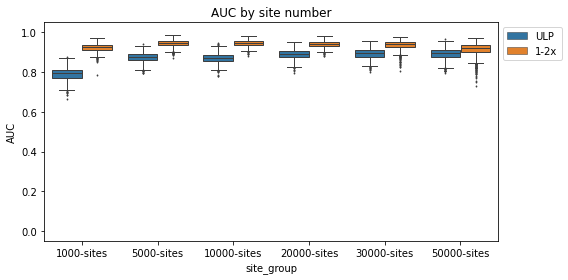

In [9]:
fig,ax = plt.subplots(figsize = (8,4))
sns.boxplot(x = boxplot_data['site_group'],
            y = boxplot_data[metric],
            hue = boxplot_data['dataset'],
           width = 0.8,
           order = site_groups,
           ax = ax, fliersize = 1, linewidth = 1)
plt.legend(bbox_to_anchor = [1,1], loc = 'upper left');
plt.ylim(-0.05,1.05)
plt.tight_layout()
plt.title(metric+' by site number')
fig.tight_layout()
plt.savefig('plots/delfi_number_of_sites.pdf')

In [10]:

# cellColours = pd.DataFrame(pd.Series(['white', 'lightgrey']))
# for i in range(6):
#     cellColours[i] = cellColours[0]
    
# fig, ax = plt.subplots(figsize=(6,3))
# ax.axis('off')

# table = plt.table(cellText=(metrics_df).values,
#                       rowLabels=metrics_df.index,
#                       colLabels=metrics_df.columns,
#                       cellColours=cellColours.values,
#                       rowColours = cellColours[0].values,
#                      colLoc='right',
#                  loc = 'center')

# for key, cell in table.get_celld().items():
#     cell.set_linewidth(0)
# ax.axhline(.55, color = 'black', linewidth = .7)
# plt.savefig('delfi_number_of_sites_metrics.pdf')